In [9]:
!pip install filterpy

# Kalman Filter to predict time series : 

In [10]:
import numpy as np
from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise
import json 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [68]:
data = None
# Opening JSON file 
with open('example.json') as f:
   data = json.load(f) 
df = pd.DataFrame.from_dict(data['Time Series (1min)'], orient='index',dtype=float).iloc[::-1]#.reset_index().set_index([pd.Index(list(range(9277))),"index"])


In [69]:
my_filter = KalmanFilter(dim_x=1, dim_z=1)

In [70]:
my_filter.x = np.array([df['4. close'].mean()])       # initial state (location and velocity)

my_filter.F = np.array([[1.]])    # state transition matrix

my_filter.H = np.array([[1.]])    # Measurement function
#my_filter.P = df['4. close'].rolling(7).std().dropna().mean()                 # covariance matrix
#my_filter.R = df['4. close'].rolling(7).std().dropna().mean()                      # state uncertainty
#my_filter.Q = Q_discrete_white_noise(2, dt, .1) # process uncertainty

In [71]:
measurements = df['4. close']
predicted = []
for meas in measurements:
    my_filter.predict()
    my_filter.update(float(meas))
    # do something with the output
    predicted.append(my_filter.x[0])

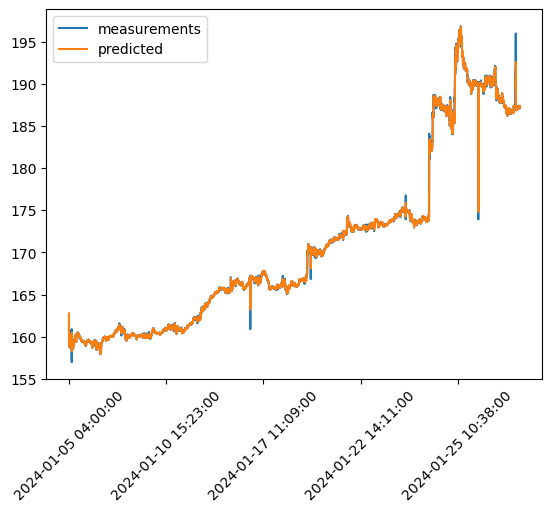

In [72]:
df['4. close'].shift(-1).plot(label='measurements')#.iloc[10:20]
plt.plot(predicted,label='predicted')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# It Seems to fit pretty well

But when you look closer you see a discontinuity between the curves. The kalman prediction seems lagged

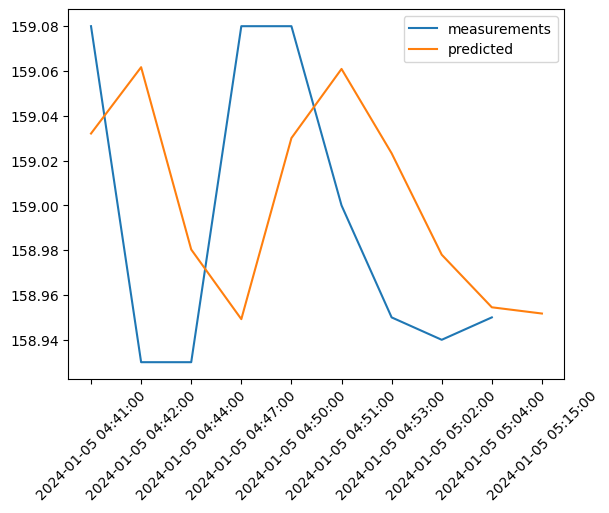

In [73]:
df['4. close'].iloc[10:20].shift(-1).plot(label='measurements')#.iloc[10:20]
plt.plot(predicted[10:20],label='predicted')
plt.legend()
plt.xticks(rotation=45)
plt.show()

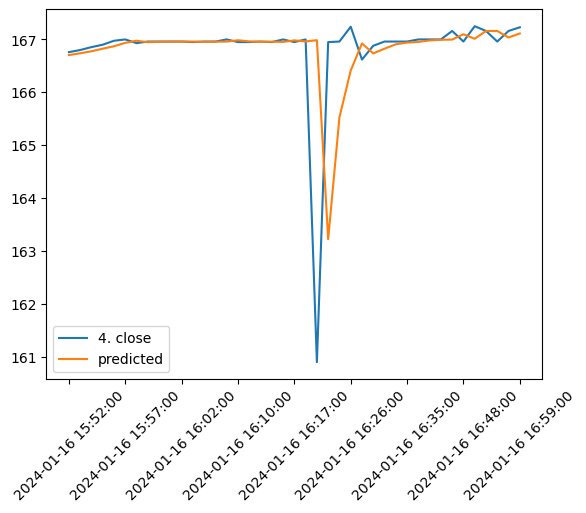

In [100]:
test = df['4. close'].shift(-1).to_frame()
test['predicted']=predicted
test.loc['2024-01-16 15:52:00':'2024-01-16 16:59:00'].plot()
plt.legend()
plt.xticks(rotation=45)
plt.show()

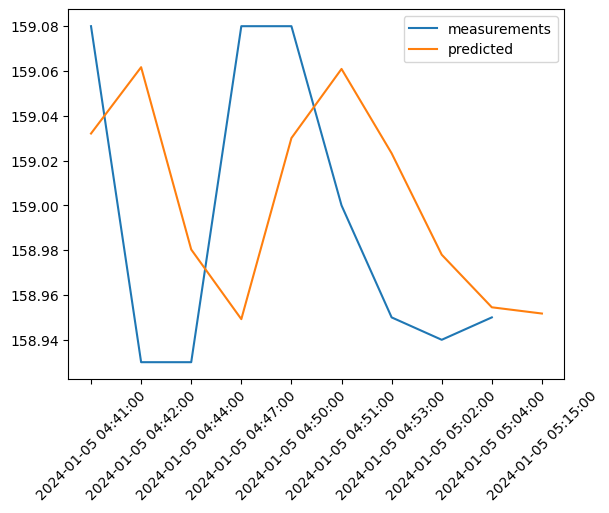

In [74]:
df['4. close'].iloc[10:20].shift(-1).plot(label='measurements')#.iloc[10:20]
plt.plot(predicted[10:20],label='predicted')
plt.legend()
plt.xticks(rotation=45)
plt.show()